In [130]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
cs13 = pd.Series.from_csv("C:\\Users\\nicho\\Documents\\Financial Math\\IAQF Financial Engineering Competition\\ARIMA\\CS13.csv",
                 header = 0)
cs35 = pd.Series.from_csv("C:\\Users\\nicho\\Documents\\Financial Math\\IAQF Financial Engineering Competition\\ARIMA\\CS35.csv",
                 header = 0)
cs57 = pd.Series.from_csv("C:\\Users\\nicho\\Documents\\Financial Math\\IAQF Financial Engineering Competition\\ARIMA\\CS57.csv",
                 header = 0)
cs710 = pd.Series.from_csv("C:\\Users\\nicho\\Documents\\Financial Math\\IAQF Financial Engineering Competition\\ARIMA\\CS710.csv",
                 header = 0)

C:\Users\nicho\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [3]:
CS13 = np.array(cs13)
CS35 = np.array(cs35)
CS57 = np.array(cs57)
CS710 = np.array(cs710)

In [63]:
np.shape(CS13)

(5509,)

In [73]:
np.shape(lab)

(5504,)

In [4]:
spreads = np.vstack((CS13,CS35,CS57,CS710))
spreads = np.array(spreads)

In [14]:
y = []
deltas = [[0]*5508]*4
delta_cs13 = []

for i in range(len(spreads[0])-1):
    j=0
    
    delta_cs13.append(spreads[0][i+1]-spreads[0][i])
    for k in range(4):
        deltas[k][i] = spreads[k][i+1] - spreads[k][i]
        if deltas[k][i] > 0:
            j+=1
        else:
            j-=1
            
    if j > 0:
        y.append(1)
    elif j < 0:
        y.append(-1)
    else:
        y.append(0)
        
y = np.array(y)

In [6]:
np.shape(deltas)

(4, 5508)

In [169]:
#X1 = np.delete(spreads, (5508), axis=1)

In [7]:
size = 5000
spreads_train = np.delete(deltas, slice(size-1,5507), axis = 1)
spreads_train = np.transpose(spreads_train)
spreads_test = np.delete(deltas, slice(0,size), axis = 1)
spreads_test = np.transpose(spreads_test)
label_train = np.delete(y, slice(size-1,5507), axis = 0)
label_test = np.delete(y, slice(0,size), axis = 0)

In [35]:
train = np.delete(delta_cs13, slice(size-1,5507), axis = 0)
test = np.delete(delta_cs13, slice(0,size), axis = 0)
train_lab = np.delete(CS13, slice(size-1,5508), axis = 0)
test_lab = np.delete(CS13, slice(1, size+2), axis = 0)

In [39]:
np.shape(train)

(5000,)

In [58]:
train.reshape(-1,1)
train_lab.reshape(-1,1)
test.reshape(-1,1)
test_lab.reshape(-1,1)
np.shape(train)

(5000,)

In [8]:
print(label_train)

[-1  1 -1 ...  1 -1 -1]


In [61]:
clf = svm.LinearSVR(random_state=0)

In [62]:
clf.fit(train, train_lab)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.01785714  0.01261905 -0.0147619  ...  0.02214286  0.00571429
 -0.02      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
clf.predict(spreads_test)

array([-0.33651644, -0.22382764, -0.1111506 , -0.56186024, -0.22382764,
       -0.6744807 ,  0.00149741, -1.12421732,  0.22663731, -0.44919973,
        0.11409913, -0.78704387, -0.56186024, -0.22382764, -0.56186024,
       -0.33651644,  0.33909471, -0.56186024, -0.56186024, -0.22382764,
       -0.22382764, -0.33651644,  0.00149741, -0.56186024, -0.44919973,
       -0.56186024, -0.8995325 , -0.78704387,  0.00149741, -0.33651644,
       -0.56186024, -0.33651644, -0.44919973, -0.22382764, -0.6744807 ,
       -0.22382764, -0.56186024, -0.78704387, -0.1111506 , -0.56186024,
       -0.22382764, -0.22382764,  0.33909471,  0.00149741, -0.6744807 ,
        0.00149741, -0.1111506 , -0.8995325 , -0.1111506 , -0.33651644,
       -0.1111506 , -0.44919973, -0.33651644, -0.56186024, -0.33651644,
       -0.6744807 , -0.22382764, -0.44919973,  0.45145412,  0.00149741,
       -0.44919973,  0.11409913, -0.6744807 , -0.6744807 , -0.44919973,
       -0.1111506 ,  0.33909471, -0.78704387, -0.56186024,  0.22

In [ ]:
#starts new method, results much better, use this data

In [86]:
col0 = np.delete(CS13, slice(5504, 5508), axis=0)
col0 = np.delete(col0, slice(0,1), axis=0)
col1 = np.delete(CS13, slice(5505, 5508), axis=0)
col1 = np.delete(col1,  slice(0,2))
col2 = np.delete(CS13, slice(5506, 5508), axis=0)
col2 = np.delete(col2, slice(0,3), axis=0)
label = np.delete(CS13, slice(5507, 5508), axis=0)
label = np.delete(label, slice(0,4), axis=0)

In [87]:
X = np.vstack((col0,col1,col2))
X = np.array(X)

In [107]:
size = 5000
X_train = np.transpose(np.delete(X, slice(size-1,5503), axis=1))
X_test = np.transpose(np.delete(X, slice(0,size), axis=1))
Y_train = np.delete(label, slice(size-1,5503), axis=0)
Y_test = np.delete(label, slice(0,size), axis=0)

In [109]:
np.shape(X_train)

(5000, 3)

In [110]:
clf = svm.SVR()

In [111]:
clf.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
Y_predict = clf.predict(X_test)

In [131]:
err = []
index = []

for i in range(len(Y_predict)):
    err.append(abs(Y_predict[i] - Y_test[i]))
    index.append(i)
    
L1 = np.sum(err)
Linf = np.max(err)
L2 = np.sqrt(np.sum(np.square(err)))
rmse = L2/len(Y_test)

In [129]:
rmse

0.0010629532234281852

In [120]:
Linf

0.187767736448638

In [118]:
Y_test

array([0.84880952, 0.86619048, 0.85142857, 0.84142857, 0.82404762,
       0.83666667, 0.84095238, 0.83619048, 0.83142857, 0.83142857,
       0.82880952, 0.81666667, 0.80928571, 0.86095238, 0.85142857,
       0.84619048, 0.83880952, 0.83619048, 0.84357143, 0.84880952,
       0.82666667, 0.83142857, 0.81619048, 0.79404762, 0.78880952,
       0.79142857, 0.79142857, 0.77880952, 0.78404762, 0.77880952,
       0.79571429, 0.77404762, 0.75833333, 0.75357143, 0.74571429,
       0.72833333, 0.72309524, 0.73      , 0.73047619, 0.74785714,
       0.75785714, 0.73309524, 0.74571429, 0.75309524, 0.74571429,
       0.75571429, 0.7452381 , 0.76      , 0.74785714, 0.75261905,
       0.75      , 0.74785714, 0.74261905, 0.74690476, 0.73476191,
       0.78261905, 0.77738095, 0.78      , 0.79261905, 0.7747619 ,
       0.7647619 , 0.74738095, 0.7747619 , 0.78      , 0.76738095,
       0.74952381, 0.75738095, 0.7547619 , 0.77      , 0.76261905,
       0.74785714, 0.73      , 0.74785714, 0.74      , 0.73047

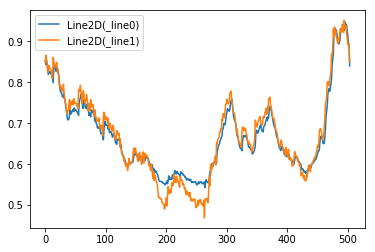

In [136]:
plot = plt.plot(index,Y_predict,Y_test)
plt.legend(plot)

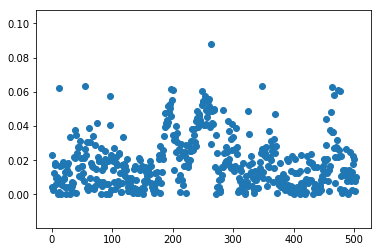

In [137]:
plt.scatter(index,err)

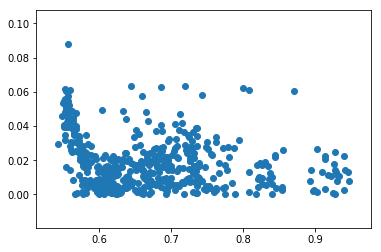

In [138]:
plt.scatter(Y_predict,err)